# Tutorial 05: Running PyCIGAR without RL

In some cases, you may want to run experiments without Reinforcement Learning controllers. In this case, PyCIGAR provides NoRLEnv (No RL Environment).

In [1]:
import pycigar
import pandas as pd
from pycigar.utils.input_parser import input_parser

misc_inputs = '../data/ieee37busdata/misc_inputs.csv'
dss = '../data/ieee37busdata/ieee37.dss'
load_solar = '../data/ieee37busdata/load_solar_data.csv'
breakpoints = '../data/ieee37busdata/breakpoints.csv'

sim_params = input_parser(misc_inputs, dss, load_solar, breakpoints, benchmark=True, percentage_hack=0.45)
start = 100
sim_params['scenario_config']['start_end_time'] = [start, start + 1500]  # fix the exp start and end time
sim_params['env_config']['sims_per_step'] = 1 # on 1 step call, it is equal to 1 simulation step.
del sim_params['attack_randomization'] # turn off the attack randomization

from pycigar.envs.norl_env import NoRLEnv
env = NoRLEnv(sim_params=sim_params) # init env with the sim_params above

env.reset()
done = False
while not done:
    done = env.step() # every step call will return done, the status whether the exp is finished or not

Instructions for updating:
non-resource variables are not supported in the long term


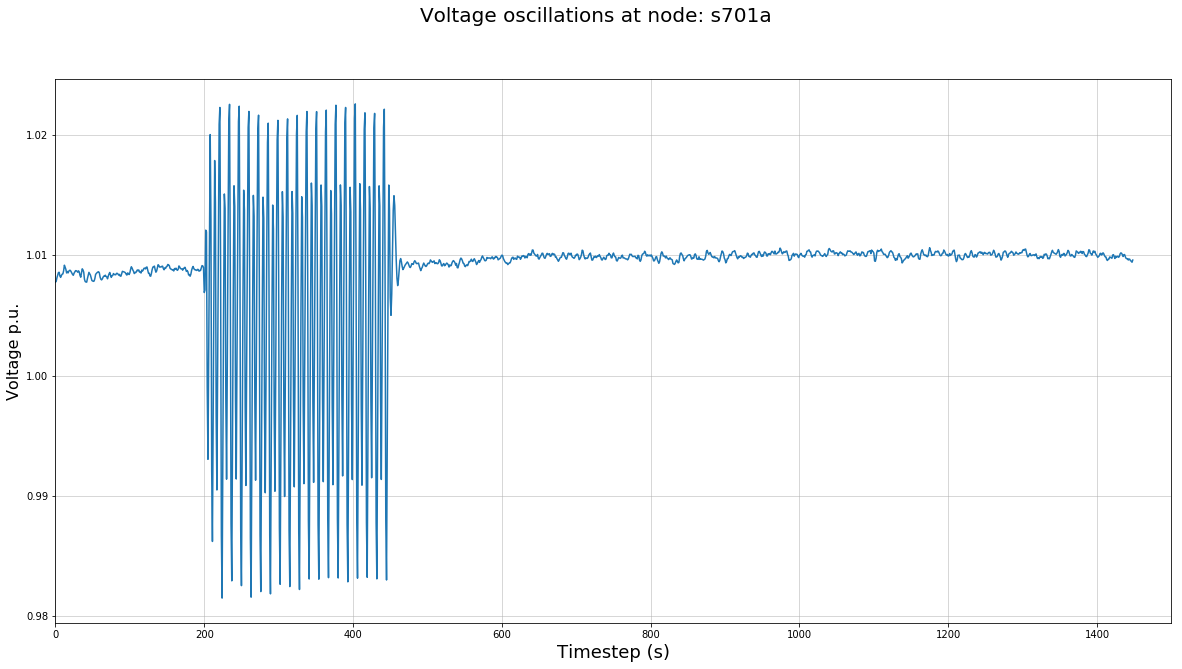

In [2]:
from pycigar.utils.logging import logger
Logger = logger()
import matplotlib.pyplot as plt 
plt.switch_backend('Tkagg')
%matplotlib inline

f, ax = plt.subplots(figsize=(20, 10))

ax.grid(linestyle='-', linewidth=0.5)
ax.set_xlim([0, 1500])
node_id = 's701a'
f.suptitle('Voltage oscillations at node: {}'.format(node_id), fontsize=20)
plt.xlabel('Timestep (s)', fontsize=18)
plt.ylabel('Voltage p.u.', fontsize=16)
ax.plot(Logger.log_dict[node_id]['voltage'])
plt.show()